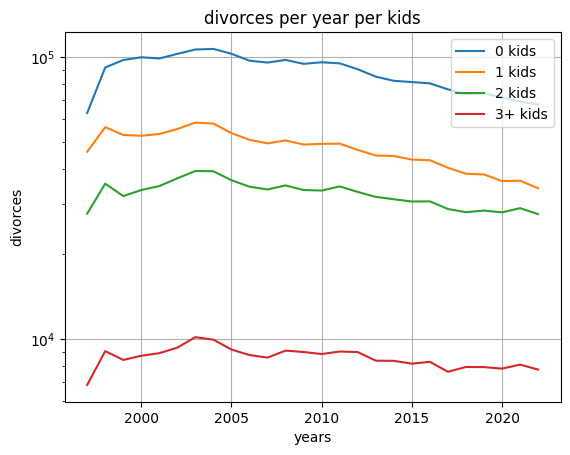

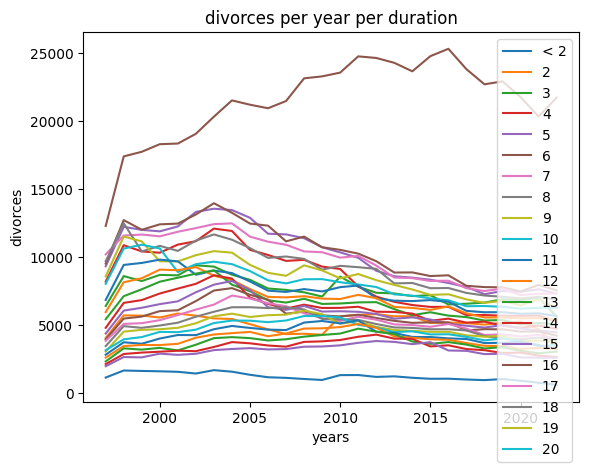

row 28 in csv [ 945. 1211.  761.  222.]
transposed (4, 26)
(26, 26, 4)


In [1]:
# code to load the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

csv_df = pd.read_csv(os.getcwd() + "/../dat/dataset.csv", delimiter='\t',
                         names=["year", "duration", "0 kids", "1 kid", "2 kids", "3+ kids"], skiprows=8)[:-4]

num_durations = 26  # 20 duration categories
num_years = int(len(csv_df["year"]) / num_durations)
num_kid_categories = 4  # {0, 1, 2, 3+}

year_index_offset = 1997
duration_index_offset = 1  # 1 = marriage less than 2 years -> index 0

dataset_array = np.zeros((num_years, num_durations, num_kid_categories))


def convert_duration_to_index(duration_string, offset=duration_index_offset):
    strings = duration_string.split(" ")
    if len(strings) == 4:
        return 0
    else:
        return int(strings[1]) - offset


def fill_dataset_array():
    for line in csv_df.iterrows():
        year_index = int(line[1]["year"]) - year_index_offset
        duration_index = convert_duration_to_index(line[1]["duration"])
        dataset_array[year_index][duration_index][0] = line[1]["0 kids"]
        dataset_array[year_index][duration_index][1] = line[1]["1 kid"]
        dataset_array[year_index][duration_index][2] = line[1]["2 kids"]
        dataset_array[year_index][duration_index][3] = line[1]["3+ kids"]


if __name__ == "__main__":
    fill_dataset_array()

    test = dataset_array.copy()

    x_years = range(1997, 2023)

    # example plots
    # example 1
    for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
        plt.plot(x_years, kid_filtered)

    plt.title("divorces per year per kids")
    plt.xlabel("years")
    plt.ylabel("divorces")
    plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
    plt.yscale('log') # for better seeing 3+ kids curve
    plt.grid()
    plt.show()

    # example 2
    for duration_filtered in dataset_array.swapaxes(0, 1).sum(axis=2):
        plt.plot(x_years, duration_filtered)

    plt.title("divorces per year per duration")
    plt.xlabel("years")
    #plt.yscale('log')
    plt.ylabel("divorces")
    legend = []
    for d in range(1, 21):
        if d == 1:
            legend.append("< 2")
        else:
            legend.append(str(d))
    plt.legend(legend)
    plt.show()

    # intuition for np.array.swapaxes and .sum
    print("row 28 in csv", dataset_array[0][19])
    print("transposed", dataset_array.swapaxes(0, 2).sum(axis=1).shape)
    print(dataset_array.shape)




[ 63164.  91610.  97342.  99558.  98590. 102384. 106087. 106585. 102443.
  96808.  95372.  97427.  94343.  95572.  94748.  90284.  84989.  82157.
  81316.  80461.  76632.  73543.  74349.  71663.  69284.  67727.]
[46041. 56285. 52782. 52463. 53222. 55453. 58417. 57924. 53607. 50750.
 49298. 50476. 48827. 49089. 49194. 46731. 44637. 44459. 43192. 42948.
 40386. 38477. 38250. 36234. 36330. 34179.]
[27763. 35479. 32054. 33683. 34781. 37074. 39339. 39258. 36486. 34615.
 33828. 34967. 33672. 33539. 34688. 33161. 31845. 31234. 30666. 30705.
 28845. 28103. 28478. 28067. 29040. 27670.]
[ 6860.  9042.  8413.  8704.  8890.  9303. 10132.  9924.  9157.  8755.
  8574.  9078.  8975.  8827.  9010.  8971.  8362.  8349.  8161.  8283.
  7638.  7943.  7933.  7837.  8097.  7777.]


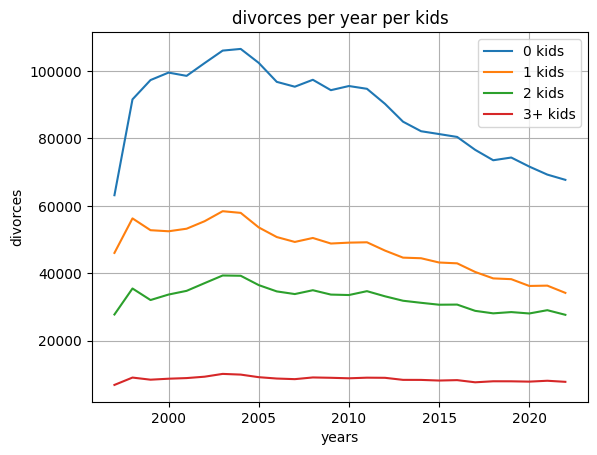

,year,duration,0 kids,1 kid,2 kids,3+ kids
0,1997,Ehedauer unter 2 Jahren,971.0,144.0,12.0,2.0
1,1997,Ehedauer 2 Jahre,3298.0,675.0,59.0,9.0
2,1997,Ehedauer 3 Jahre,4526.0,1598.0,237.0,28.0
3,1997,Ehedauer 4 Jahre,4984.0,2652.0,496.0,51.0
4,1997,Ehedauer 5 Jahre,5178.0,3250.0,781.0,99.0
...,...,...,...,...,...,...
671,2022,Ehedauer 22 Jahre,1522.0,976.0,551.0,167.0
672,2022,Ehedauer 23 Jahre,1668.0,866.0,379.0,128.0
673,2022,Ehedauer 24 Jahre,1621.0,616.0,303.0,98.0
674,2022,Ehedauer 25 Jahre,1725.0,549.0,227.0,81.0


In [2]:


x_years = range(1997, 2023)

    # example plots
    # example 1
for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
    print(kid_filtered)
    plt.plot(x_years, kid_filtered)

plt.title("divorces per year per kids")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.grid()

plt.show()

csv_df
#print(kid_filtered)

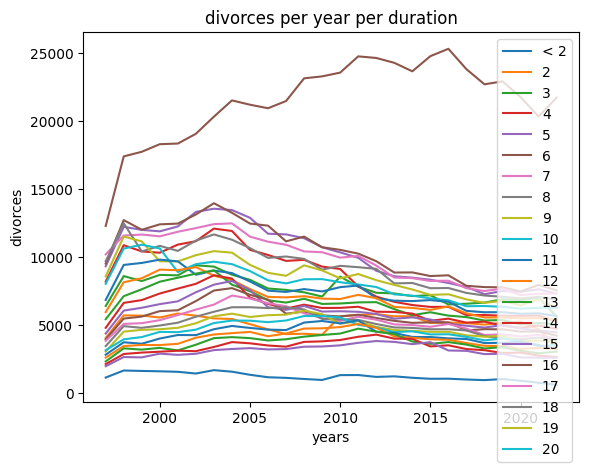

In [3]:
for duration_filtered in dataset_array.swapaxes(0, 1).sum(axis=2):
        plt.plot(x_years, duration_filtered)

plt.title("divorces per year per duration")
plt.xlabel("years")
#plt.yscale('log')
plt.ylabel("divorces")

legend = []
for d in range(1, 21):
    if d == 1:
        legend.append("< 2")
    else:
        legend.append(str(d))
plt.legend(legend)
plt.show()


In [4]:
print(dataset_array[0][1][0]) #year starts from 1997, duration of marriage = 1, kids = 0; Resulting #divorces

3298.0


In [5]:
print(dataset_array[25][19][0]) #year starts from 1997, duration of marriage = 1, kids = 0; Resulting #divorces

1235.0


1528717.0
[ 506. 2569. 3823. 3351. 4149. 3847. 3285. 2707. 2242. 2085. 1708. 1545.
 1308. 1206. 1139. 1070.  976. 1088. 1104.]
test
die gesamt anzahl mit null kindern war 39708.0
ist es gleich 1? 7.124206708975521


Text(0, 0.5, 'mean divorce after years')

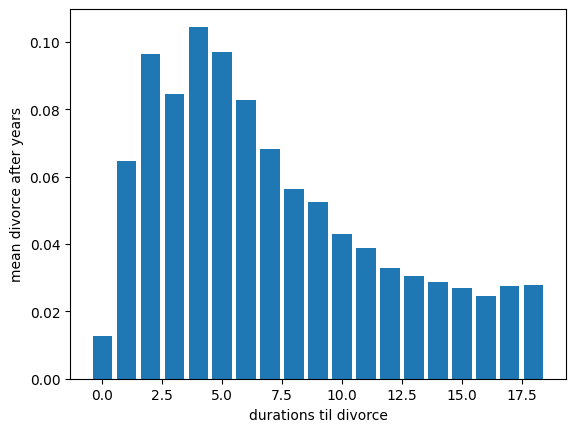

In [6]:
mean_divorces = np.zeros(26)
mean_duration = np.zeros(19)
sum_duration = 0
each_duration = np.zeros(19)
number_kids = 0

for year in range(26):
    for duration in range(19):
      mean_divorces[year] = np.mean(dataset_array[year][duration][number_kids])
      mean_duration[duration] = np.mean(dataset_array[year][duration][number_kids])  
      each_duration[duration] = (dataset_array[year][duration][number_kids])
      sum_duration += dataset_array[year][duration][number_kids]

duration = list(range(0,19))
years=list(range(1997,2023))

print(sum_duration)
print(each_duration)
total = np.sum(each_duration)

195.958

print("test")
print("die gesamt anzahl mit null kindern war", total)
equal1 = ((duration @ each_duration)/total)
print("ist es gleich 1?", equal1)

plt.bar(duration, each_duration/total)
plt.xlabel("durations til divorce")
plt.ylabel("mean divorce after years")


994310.0
[  64.  646. 1316. 1356. 2165. 2326. 2278. 2112. 1917. 1808. 1647. 1533.
 1425. 1250. 1165. 1080. 1040. 1020. 1091.]
test
die gesamt anzahl mit null kindern war 27239.0
ist es gleich 1? 8.82950915966078


Text(0, 0.5, 'mean divorce after years')

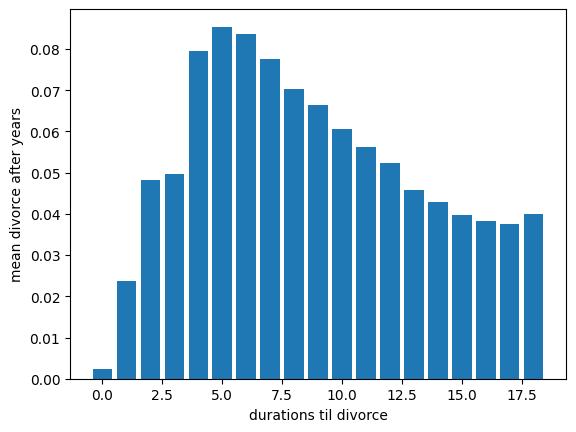

In [7]:
mean_divorces = np.zeros(26)
mean_duration = np.zeros(19)
sum_duration = 0
each_duration = np.zeros(19)
number_kids = 1

for year in range(26):
    for duration in range(19):
      mean_divorces[year] = np.mean(dataset_array[year][duration][number_kids])
      mean_duration[duration] = np.mean(dataset_array[year][duration][number_kids])  
      each_duration[duration] = (dataset_array[year][duration][number_kids])
      sum_duration += dataset_array[year][duration][number_kids]

duration = list(range(0,19))
years=list(range(1997,2023))

print(sum_duration)
print(each_duration)
total = np.sum(each_duration)

print("test")
print("die gesamt anzahl mit null kindern war", total)
equal1 = ((duration @ each_duration)/total)
print("ist es gleich 1?", equal1)

plt.bar(duration, each_duration/total)
plt.xlabel("durations til divorce")
plt.ylabel("mean divorce after years")


733515.0
array mit den einzelnen Werte bei 3 Kindern [  21.  141.  412.  456.  854. 1148. 1471. 1721. 1717. 1941. 1831. 1788.
 1760. 1713. 1628. 1515. 1450. 1355. 1095.]
test
die gesamt anzahl mit null kindern war 24017.0
ist es gleich 1? 10.675604779947538


Text(0, 0.5, 'divorce after years')

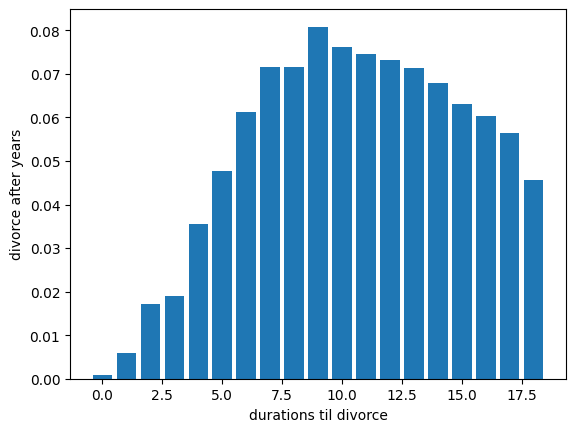

In [8]:
mean_divorces = np.zeros(26)
mean_duration = np.zeros(19)
sum_duration = 0
each_duration = np.zeros(19)

for year in range(26):
    for duration in range(19):
      mean_divorces[year] = np.mean(dataset_array[year][duration][2])
      mean_duration[duration] = np.mean(dataset_array[year][duration][2])  
      each_duration[duration] = (dataset_array[year][duration][2])
      sum_duration += dataset_array[year][duration][2]

duration = list(range(0,19))
years=list(range(1997,2023))

print(sum_duration)
print("array mit den einzelnen Werte bei 3 Kindern",each_duration)
total = np.sum(each_duration)

print("test")
print("die gesamt anzahl mit null kindern war", total)
equal1 = ((duration @ each_duration)/total)
print("ist es gleich 1?", equal1)

plt.bar(duration, each_duration/total)
plt.xlabel("durations til divorce")
plt.ylabel("divorce after years")


array mit den einzelnen Werte bei 3 Kindern [  5.  30.  62.  79. 144. 221. 285. 326. 370. 435. 464. 522. 553. 551.
 519. 542. 503. 471. 409.]
test
die gesamt anzahl mit null kindern war 6491.0
ist es gleich 1? 11.698197504236635


Text(0, 0.5, 'mean divorce after years')

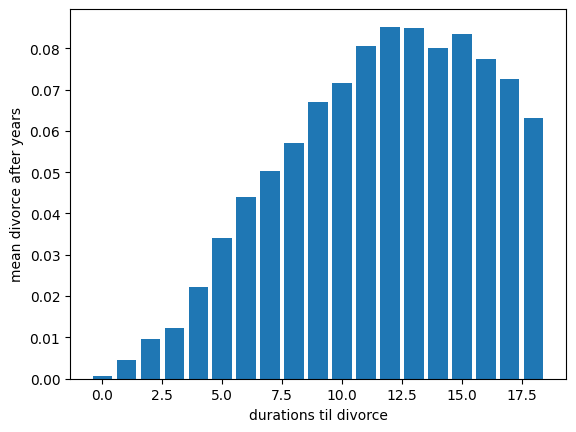

In [9]:
mean_divorces = np.zeros(26)
mean_duration = np.zeros(19)
sum_duration = 0
each_duration = np.zeros(19)

for year in range(26):
    for duration in range(19):
      mean_divorces[year] = np.mean(dataset_array[year][duration][3])
      mean_duration[duration] = np.mean(dataset_array[year][duration][3])  
      each_duration[duration] = (dataset_array[year][duration][3] ) #we use this
      sum_duration += dataset_array[year][duration][3]

duration = list(range(0,19))
years=list(range(1997,2023))


print("array mit den einzelnen Werte bei 3 Kindern",each_duration)
total = np.sum(each_duration)

print("test")
print("die gesamt anzahl mit null kindern war", total)
equal1 = ((duration @ each_duration)/total)
print("ist es gleich 1?", equal1)

plt.bar(duration, each_duration/total)
plt.xlabel("durations til divorce")
plt.ylabel("mean divorce after years")


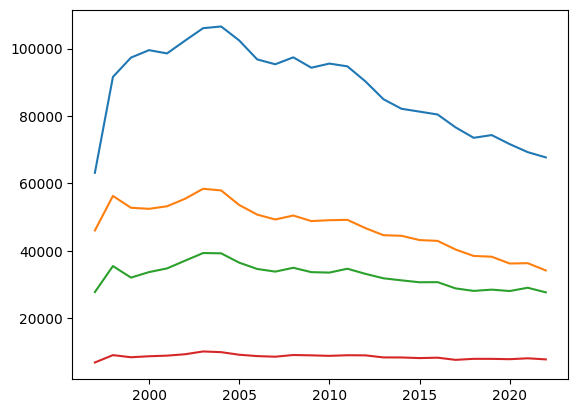

In [14]:
for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1): #year duration kids
    plt.plot(x_years, kid_filtered)

In [15]:
kids3 = [6408, 8361, 7746, 7888, 7972, 8321, 9025, 8773, 8015, 7531, 7428, 7854,
 7752, 7632, 7733, 7686, 7227, 7119, 7091, 7104, 6607, 7009, 6916, 6855,
 7090, 6815]
total = np.sum(kids3)
print(total)

195958


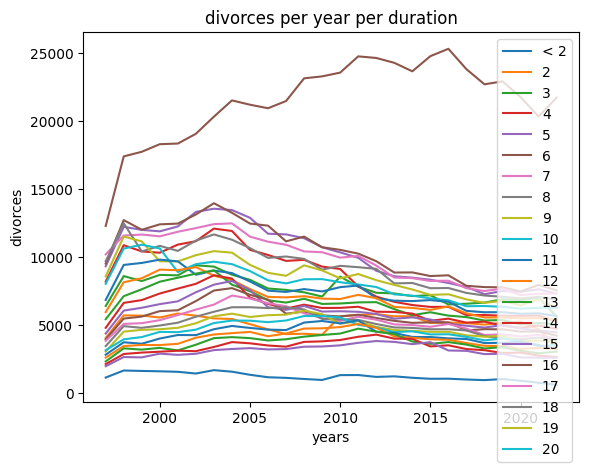

In [17]:
for duration_filtered in dataset_array.swapaxes(1, 0).sum(axis=2):
        plt.plot(x_years, duration_filtered)
plt.title("divorces per year per duration")
plt.xlabel("years")
#plt.yscale('log')
plt.ylabel("divorces")
legend = []
for d in range(1, 21):
    if d == 1:
        legend.append("< 2")
    else:
        legend.append(str(d))
plt.legend(legend)
plt.show()

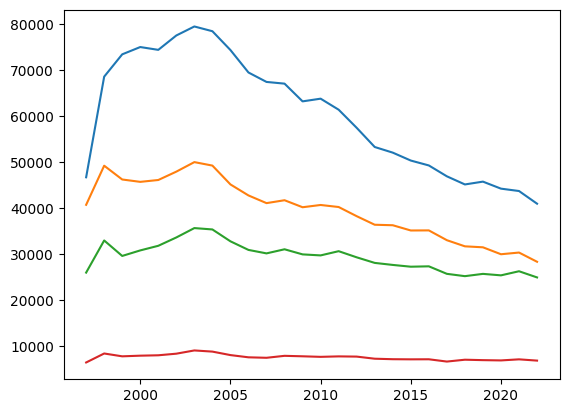

In [ ]:
for duration_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
        plt.plot(x_years, duration_filtered)


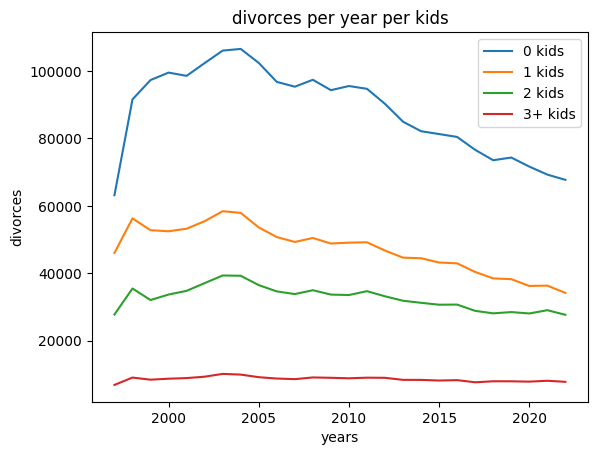

In [18]:
x_years = range(1997, 2023)

    # example plots
    # example 1
for kid_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
    plt.plot(x_years, kid_filtered)

plt.title("divorces per year per kids")
plt.xlabel("years")
plt.ylabel("divorces")
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.show()

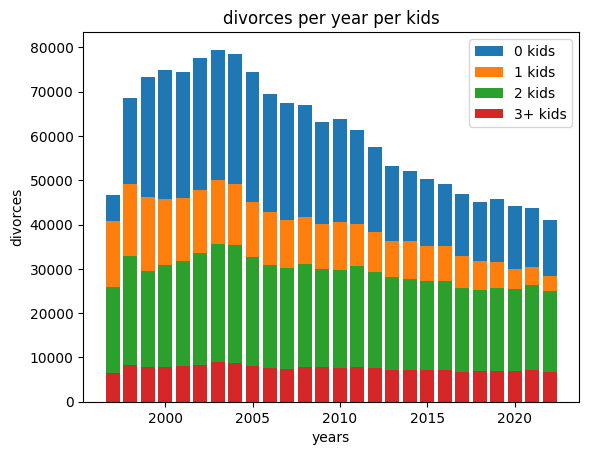

In [ ]:
for duration_filtered in dataset_array.swapaxes(0, 2).sum(axis=1):
        plt.bar(x_years, duration_filtered)
plt.title("divorces per year per kids")
plt.xlabel("years")
plt.ylabel("divorces")
#plt.yscale('log')
plt.legend(["0 kids", "1 kids", "2 kids", "3+ kids"])
plt.show()

[3017.77692308 1985.63076923 1467.80576923  376.84230769]


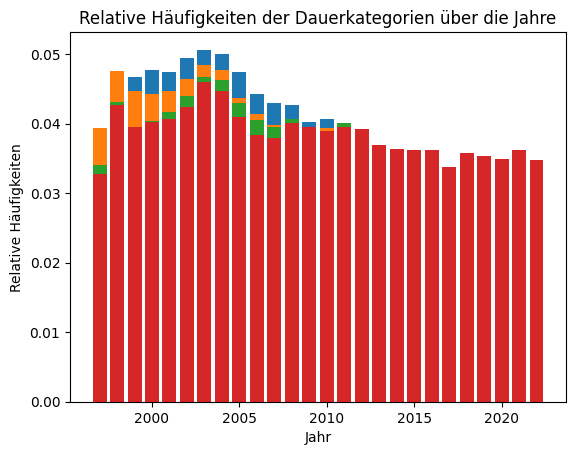

In [ ]:
# Assuming dataset_array is a 3D array with shape (num_years, num_durations, num_kid_categories)

# Calculate the sum of each duration category for each kid category
sum_per_kid_category = dataset_array.sum(axis=(0, 1))
print(dataset_array.mean(axis=(0,1)))
# Calculate the relative frequencies
relative_frequencies = dataset_array.sum(axis=1) / sum_per_kid_category

# Iteration over the relative frequencies and creation of bar charts
for duration_filtered in relative_frequencies.transpose():
    plt.bar(x_years, duration_filtered)

# Diagramm beschriften
plt.title('Relative Häufigkeiten der Dauerkategorien über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Relative Häufigkeiten')

# Diagramm anzeigen
plt.show()


Jahr: 0 duration 0 kinder 3 mit dem autfteren 2.0
Jahr: 0 duration 1 kinder 3 mit dem autfteren 9.0
Jahr: 0 duration 2 kinder 3 mit dem autfteren 28.0
Jahr: 0 duration 3 kinder 3 mit dem autfteren 51.0
Jahr: 0 duration 4 kinder 3 mit dem autfteren 99.0
Jahr: 0 duration 5 kinder 3 mit dem autfteren 148.0
Jahr: 0 duration 6 kinder 3 mit dem autfteren 235.0
Jahr: 0 duration 7 kinder 3 mit dem autfteren 346.0
Jahr: 0 duration 8 kinder 3 mit dem autfteren 398.0
Jahr: 0 duration 9 kinder 3 mit dem autfteren 521.0
Jahr: 0 duration 10 kinder 3 mit dem autfteren 499.0
Jahr: 0 duration 11 kinder 3 mit dem autfteren 532.0
Jahr: 0 duration 12 kinder 3 mit dem autfteren 530.0
Jahr: 0 duration 13 kinder 3 mit dem autfteren 541.0
Jahr: 0 duration 14 kinder 3 mit dem autfteren 543.0
Jahr: 0 duration 15 kinder 3 mit dem autfteren 485.0
Jahr: 0 duration 16 kinder 3 mit dem autfteren 514.0
Jahr: 0 duration 17 kinder 3 mit dem autfteren 432.0
Jahr: 0 duration 18 kinder 3 mit dem autfteren 273.0
Jahr: 1 du

Text(0, 0.5, 'mean divorce after years')

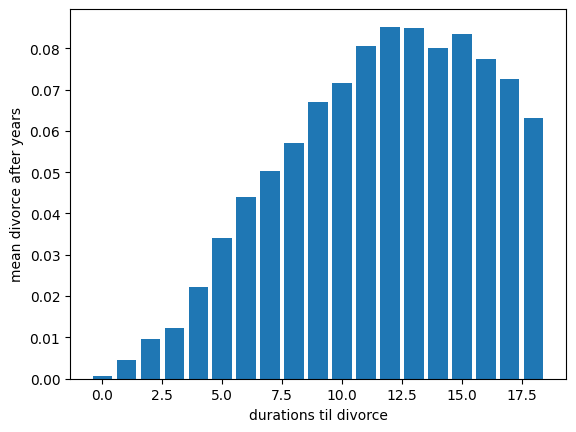

In [ ]:
mean_divorces = np.zeros(26)
mean_duration = np.zeros(19)
sum_duration = 0
each_duration = np.zeros(19)

for year in range(26):
    for duration in range(19):
      print("Jahr:", year, "duration", duration, "kinder 3 mit dem autfteren"dataset_array[year][duration][3])
      mean_divorces[year] = np.mean(dataset_array[year][duration][3])
      mean_duration[duration] = np.mean(dataset_array[year][duration][3])  
      each_duration[duration] = (dataset_array[year][duration][3] ) #we use this
      sum_duration += dataset_array[year][duration][3]

duration = list(range(0,19))
years=list(range(1997,2023))


print("array mit den einzelnen Werte bei 3 Kindern",each_duration)
total = np.sum(each_duration)

print("test")
print("die gesamt anzahl mit null kindern war", total)
equal1 = ((duration @ each_duration)/total)
print("ist es gleich 1?", equal1)

plt.bar(duration, each_duration/total)
plt.xlabel("durations til divorce")
plt.ylabel("mean divorce after years")


In [ ]:
#idee x achse die anzahl kinder und auf der y die duration und zweite y die wk  


In [ ]:
#corona 

dataset_array[26-3][duration][]

array([3512., 1573.,  489.,   92.])

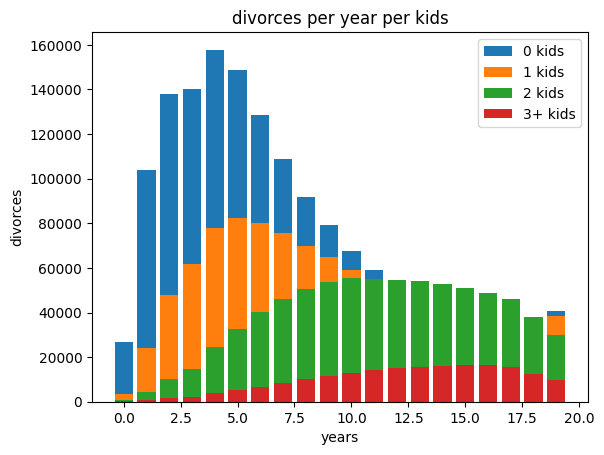

In [ ]:
csv_df

,year,duration,0 kids,1 kid,2 kids,3+ kids
0,1997,Ehedauer unter 2 Jahren,971.0,144.0,12.0,2.0
1,1997,Ehedauer 2 Jahre,3298.0,675.0,59.0,9.0
2,1997,Ehedauer 3 Jahre,4526.0,1598.0,237.0,28.0
3,1997,Ehedauer 4 Jahre,4984.0,2652.0,496.0,51.0
4,1997,Ehedauer 5 Jahre,5178.0,3250.0,781.0,99.0
...,...,...,...,...,...,...
515,2022,Ehedauer 16 Jahre,1070.0,1080.0,1515.0,542.0
516,2022,Ehedauer 17 Jahre,976.0,1040.0,1450.0,503.0
517,2022,Ehedauer 18 Jahre,1088.0,1020.0,1355.0,471.0
518,2022,Ehedauer 19 Jahre,1104.0,1091.0,1095.0,409.0


In [ ]:

print('Scheidung nach weniger als zwei Ehejahren mit 0 Kindern im Jahr 1997: ', dataset_array[0][0][0])
print('Scheidung nach weniger als zwei Ehejahren mit 1 Kindern im Jahr 1997: ', dataset_array[0][0][1])
print('Scheidung nach weniger als zwei Ehejahren mit 2 Kindern im Jahr 1997: ', dataset_array[0][0][2])
print('Scheidung nach weniger als zwei Ehejahren mit 3 Kindern im Jahr 1997: ', dataset_array[0][0][3])
print('\n')
print('Scheidung nach weniger als zwei Ehejahren mit 0 Kindern im Jahr 2023: ', dataset_array[25][0][0])
print('Scheidung nach weniger als zwei Ehejahren mit 1 Kindern im Jahr 2023: ', dataset_array[25][0][1])
print('Scheidung nach weniger als zwei Ehejahren mit 2 Kindern im Jahr 2023: ', dataset_array[25][0][2])
print('Scheidung nach weniger als zwei Ehejahren mit 3 Kindern im Jahr 2023: ', dataset_array[25][0][3])
print('\n')
print('Scheidung nach weniger als 7 Ehejahren mit 0 Kindern im Jahr 2023: ', dataset_array[25][6][0])
print('Scheidung nach weniger als 7 Ehejahren mit 1 Kindern im Jahr 2023: ', dataset_array[25][6][1])
print('Scheidung nach weniger als 7 Ehejahren mit 2 Kindern im Jahr 2023: ', dataset_array[25][6][2])
print('Scheidung nach weniger als 7 Ehejahren mit 3 Kindern im Jahr 2023: ', dataset_array[25][6][3])
print('\n')
print('Scheidung nach weniger als 20 Ehejahren mit 0 Kindern im Jahr 2023: ', dataset_array[25][19][0])
print('Scheidung nach weniger als 20 Ehejahren mit 1 Kindern im Jahr 2023: ', dataset_array[25][19][1])
print('Scheidung nach weniger als 20 Ehejahren mit 2 Kindern im Jahr 2023: ', dataset_array[25][19][2])
print('Scheidung nach weniger als 20 Ehejahren mit 3 Kindern im Jahr 2023: ', dataset_array[25][19][3])

sum = 0
for i in range(19):
    sum += dataset_array[3][i][0] #summiere über alle Ehedauern im Jahr 2000 mit einem Kind der Wer entspricht der blauben kurve im Jahr 2000

print(sum)   

Scheidung nach weniger als zwei Ehejahren mit 0 Kindern im Jahr 1997:  971.0
Scheidung nach weniger als zwei Ehejahren mit 1 Kindern im Jahr 1997:  144.0
Scheidung nach weniger als zwei Ehejahren mit 2 Kindern im Jahr 1997:  12.0
Scheidung nach weniger als zwei Ehejahren mit 3 Kindern im Jahr 1997:  2.0


Scheidung nach weniger als zwei Ehejahren mit 0 Kindern im Jahr 2023:  506.0
Scheidung nach weniger als zwei Ehejahren mit 1 Kindern im Jahr 2023:  64.0
Scheidung nach weniger als zwei Ehejahren mit 2 Kindern im Jahr 2023:  21.0
Scheidung nach weniger als zwei Ehejahren mit 3 Kindern im Jahr 2023:  5.0


Scheidung nach weniger als 7 Ehejahren mit 0 Kindern im Jahr 2023:  3285.0
Scheidung nach weniger als 7 Ehejahren mit 1 Kindern im Jahr 2023:  2278.0
Scheidung nach weniger als 7 Ehejahren mit 2 Kindern im Jahr 2023:  1471.0
Scheidung nach weniger als 7 Ehejahren mit 3 Kindern im Jahr 2023:  285.0


Scheidung nach weniger als 20 Ehejahren mit 0 Kindern im Jahr 2023:  1235.0
Scheidung 

[ 2.  2.  1.  6.  8.  4.  4.  3.  5.  8.  3.  6.  7.  3.  5. 10.  6.  4.
  8.  9.  3.  4.  6.  7.  4.] Das array ist:  25 lang.
25


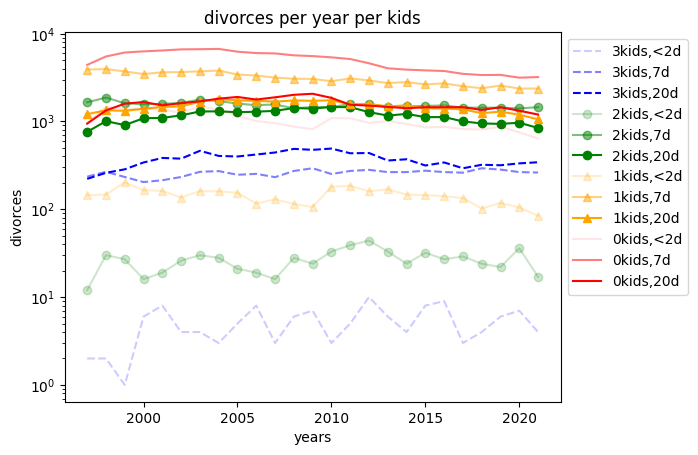

In [ ]:
# 3 kids several years of marriage
divorces_3kids_less2years = np.array([])
for year in range(25):
    divorces_3kids_less2years = np.append(divorces_3kids_less2years, dataset_array[year][0][3])
# 3 kids, 7 years of marriage
divorces_3kids_7years = np.array([])
for year in range(25):
    divorces_3kids_7years = np.append(divorces_3kids_7years, dataset_array[year][6][3])
# 3 kids, 20 years of marriage
divorces_3kids_20years = np.array([])
for year in range(25):
    divorces_3kids_20years = np.append(divorces_3kids_20years, dataset_array[year][19][3])

# 2 kids several years of marriage
divorces_2kids_less2years = np.array([])
for year in range(25):
    divorces_2kids_less2years = np.append(divorces_2kids_less2years, dataset_array[year][0][2])
# 2 kids, 7 years of marriage
divorces_2kids_7years = np.array([])
for year in range(25):
    divorces_2kids_7years = np.append(divorces_2kids_7years, dataset_array[year][6][2])
# 2 kids, 20 years of marriage
divorces_2kids_20years = np.array([])
for year in range(25):
    divorces_2kids_20years = np.append(divorces_2kids_20years, dataset_array[year][19][2])

##1 kid
# 1 kids several years of marriage
divorces_1kids_less2years = np.array([])
for year in range(25):
    divorces_1kids_less2years = np.append(divorces_1kids_less2years, dataset_array[year][0][1])
# 1 kids, 7 years of marriage
divorces_1kids_7years = np.array([])
for year in range(25):
    divorces_1kids_7years = np.append(divorces_1kids_7years, dataset_array[year][6][1])
# 1 kids, 20 years of marriage
divorces_1kids_20years = np.array([])
for year in range(25):
    divorces_1kids_20years = np.append(divorces_1kids_20years, dataset_array[year][19][1])




# 0 kids several years of marriage
# 0 kids, less than 2 years    
divorces_0kids_less2years = np.array([])
for year in range(25):
    divorces_0kids_less2years = np.append(divorces_0kids_less2years, dataset_array[year][0][0])
# 0 kids, 7 years of marriage
divorces_0kids_7years = np.array([])
for year in range(25):
    divorces_0kids_7years = np.append(divorces_0kids_7years, dataset_array[year][6][0])

# 0 kids, 20 years of marriage
divorces_0kids_20years = np.array([])
for year in range(25):
    divorces_0kids_20years = np.append(divorces_0kids_20years, dataset_array[year][19][0])
        

print(divorces_3kids_less2years, 'Das array ist: ', np.size(divorces_3kids_less2years), 'lang.')
years = np.arange(1997, 2022)
print(np.size(years))

plt.plot(years, divorces_3kids_less2years, linestyle='--', color='blue', alpha=0.2)
plt.plot(years, divorces_3kids_7years, linestyle='--', color='blue', alpha=0.5)
plt.plot(years, divorces_3kids_20years, linestyle='--', color='blue', alpha=1)

plt.plot(years, divorces_2kids_less2years, marker='o', color='green', alpha=0.2)
plt.plot(years, divorces_2kids_7years, marker='o', color='green', alpha=0.5)
plt.plot(years, divorces_2kids_20years, marker='o',color='green', alpha=1)

plt.plot(years, divorces_1kids_less2years, marker='^', color='orange', alpha=0.2)
plt.plot(years, divorces_1kids_7years, marker='^', color='orange', alpha=0.5)
plt.plot(years, divorces_1kids_20years, marker='^', color='orange', alpha=1)

plt.plot(years, divorces_0kids_less2years, color='red', alpha=0.1)
plt.plot(years, divorces_0kids_7years, color='red', alpha=0.5)
plt.plot(years, divorces_0kids_20years, color='red', alpha=1)
plt.legend(["3kids,<2d", "3kids,7d", "3kids,20d", "2kids,<2d", "2kids,7d", "2kids,20d", "1kids,<2d", "1kids,7d", "1kids,20d", "0kids,<2d", "0kids,7d", "0kids,20d",], loc='upper left', bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.title("divorces per year per kids")
plt.xlabel("years")
plt.ylabel("divorces")
plt.show()

Text(0, 0.5, 'divorces')

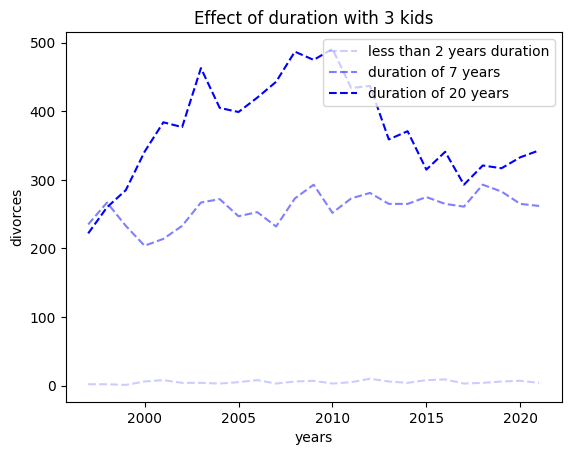

In [ ]:
plt.plot(years, divorces_3kids_less2years, linestyle='--', color='blue', alpha=0.2)
plt.plot(years, divorces_3kids_7years, linestyle='--', color='blue', alpha=0.5)
plt.plot(years, divorces_3kids_20years, linestyle='--', color='blue', alpha=1)
plt.legend(["less than 2 years duration", "duration of 7 years", "duration of 20 years"])
plt.title("Effect of duration with 3 kids")
plt.xlabel("years")
plt.ylabel("divorces")

Text(0, 0.5, 'divorces')

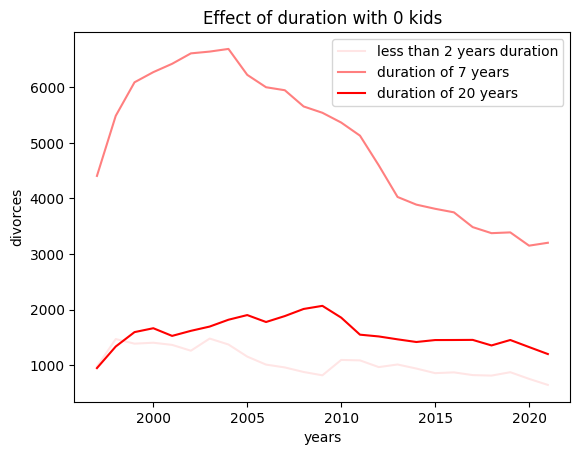

In [ ]:
plt.plot(years, divorces_0kids_less2years, color='red', alpha=0.1)
plt.plot(years, divorces_0kids_7years, color='red', alpha=0.5)
plt.plot(years, divorces_0kids_20years, color='red', alpha=1)
plt.legend(["less than 2 years duration", "duration of 7 years", "duration of 20 years"])
plt.title("Effect of duration with 0 kids")
plt.xlabel("years")
plt.ylabel("divorces")
#plt.yscale('log')

Text(0, 0.5, 'divorces')

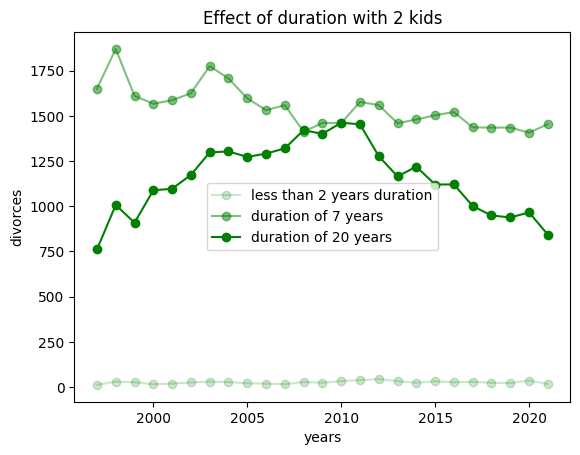

In [ ]:
plt.plot(years, divorces_2kids_less2years, marker='o', color='green', alpha=0.2)
plt.plot(years, divorces_2kids_7years, marker='o', color='green', alpha=0.5)
plt.plot(years, divorces_2kids_20years, marker='o',color='green', alpha=1)
plt.legend(["less than 2 years duration", "duration of 7 years", "duration of 20 years"])
plt.title("Effect of duration with 2 kids")
plt.xlabel("years")
plt.ylabel("divorces")

We can identify evidence suggesting a higher likelihood of divorce after a 7-year duration compared to a 20-year marriage, regardless of whether there are zero, one, or two children involved. 
However, the probability of divorce after 20 years becomes more apparent than after 7 years when there are three children.


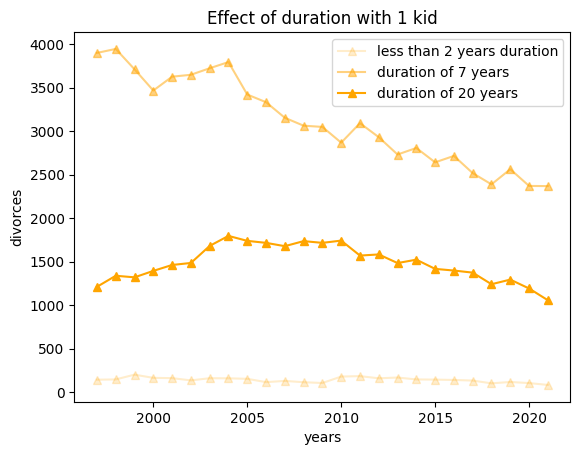

In [ ]:
plt.plot(years, divorces_1kids_less2years, marker='^', color='orange', alpha=0.2)
plt.plot(years, divorces_1kids_7years, marker='^', color='orange', alpha=0.5)
plt.plot(years, divorces_1kids_20years, marker='^', color='orange', alpha=1)
plt.legend(["less than 2 years duration", "duration of 7 years", "duration of 20 years"])
plt.title("Effect of duration with 1 kid")
plt.xlabel("years")
plt.ylabel("divorces")

text = "We can identify evidence suggesting a higher likelihood of divorce after a 7-year duration compared to a 20-year marriage, regardless of whether there are zero, one, or two children involved. \nHowever, the probability of divorce after 20 years becomes more apparent than after 7 years when there are three children."
print(text)

In [ ]:
print(dataset_array[25][19][0])
print(dataset_array[25][19][1])
print(dataset_array[25][19][2])
print(dataset_array[25][19][3])


1235.0
1071.0
889.0
324.0


[ 506. 2569. 3823. 3351. 4149. 3847. 3285. 2707. 2242. 2085. 1708. 1545.
 1308. 1206. 1139. 1070.  976. 1088. 1104. 1235.]


Text(0.5, 1.0, 'divorces in year 2023 per kid per duration')

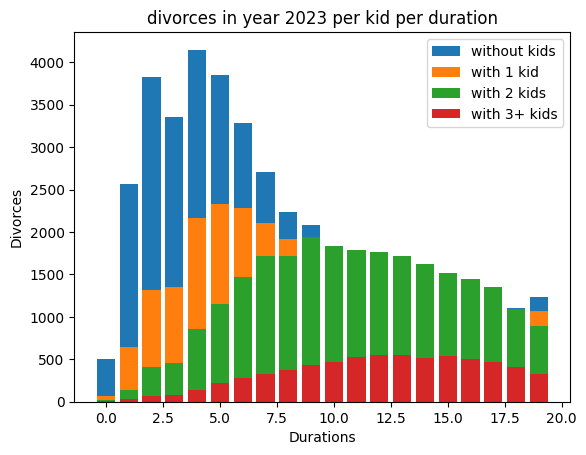

In [ ]:
year_2023_wo_kids_all_durations = np.zeros(20)
for i in range(20):
    year_2023_wo_kids_all_durations[i] = dataset_array[25][i][0]

year_2023_1kid_all_durations = np.zeros(20)
for i in range(20):
    year_2023_1kid_all_durations[i] = dataset_array[25][i][1]   

year_2023_2kids_all_durations = np.zeros(20)
for i in range(20):
    year_2023_2kids_all_durations[i] = dataset_array[25][i][2]  

year_2023_3kids_all_durations = np.zeros(20)
for i in range(20):
    year_2023_3kids_all_durations[i] = dataset_array[25][i][3]   

year_2023_wo_kids_sum_duration = sum(year_2023_wo_kids_all_durations)

plt.bar(range(0,20), year_2023_wo_kids_all_durations)  
plt.bar(range(0,20), year_2023_1kid_all_durations)  
plt.bar(range(0,20), year_2023_2kids_all_durations)  
plt.bar(range(0,20), year_2023_3kids_all_durations)  

print(year_2023_wo_kids_all_durations) 
plt.ylabel("Divorces")
plt.xlabel("Durations")
plt.legend(["without kids","with 1 kid", "with 2 kids", "with 3+ kids"])
plt.title("divorces in year 2023 per kid per duration")

Text(0.5, 1.0, 'divorces in year 2023 with and without kids per duration')

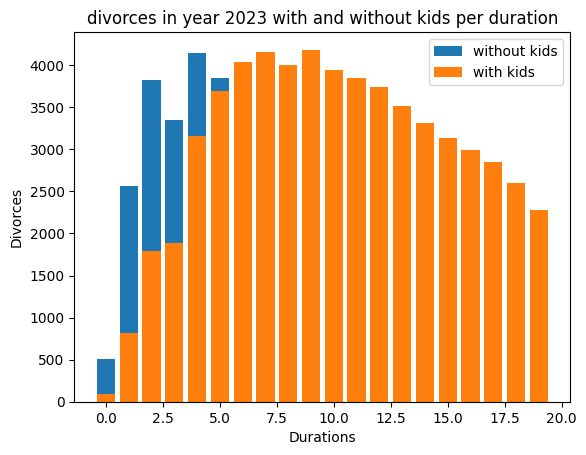

In [ ]:
with_kids_2023_all_durations = year_2023_1kid_all_durations + year_2023_2kids_all_durations + year_2023_3kids_all_durations
plt.bar(range(0,20), year_2023_wo_kids_all_durations)  
plt.bar(range(0,20), with_kids_2023_all_durations)  
 


plt.ylabel("Divorces")
plt.xlabel("Durations")
plt.legend(["without kids","with kids"])
plt.title("divorces in year 2023 with and without kids per duration")

Text(0.5, 1.0, 'divorces in year 1997 per kid per duration')

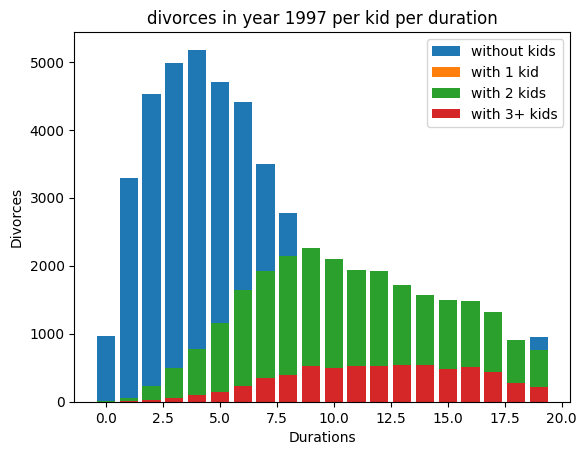

In [ ]:
year_1997_wo_kids_all_durations = np.zeros(20)
for i in range(20):
    year_1997_wo_kids_all_durations[i] = dataset_array[0][i][0]

year_1997_1kid_all_durations = np.zeros(20)
for i in range(20):
    year_2023_1kid_all_durations[i] = dataset_array[0][i][1]   

year_1997_2kids_all_durations = np.zeros(20)
for i in range(20):
    year_1997_2kids_all_durations[i] = dataset_array[0][i][2]  

year_1997_3kids_all_durations = np.zeros(20)
for i in range(20):
    year_1997_3kids_all_durations[i] = dataset_array[0][i][3]   

plt.bar(range(0,20), year_1997_wo_kids_all_durations)  
plt.bar(range(0,20), year_1997_1kid_all_durations)  
plt.bar(range(0,20), year_1997_2kids_all_durations)  
plt.bar(range(0,20), year_1997_3kids_all_durations)  

plt.ylabel("Divorces")
plt.xlabel("Durations")
plt.legend(["without kids","with 1 kid", "with 2 kids", "with 3+ kids"])
plt.title("divorces in year 1997 per kid per duration")    

Text(0.5, 1.0, 'divorces in year 1997 with and without kids per duration')

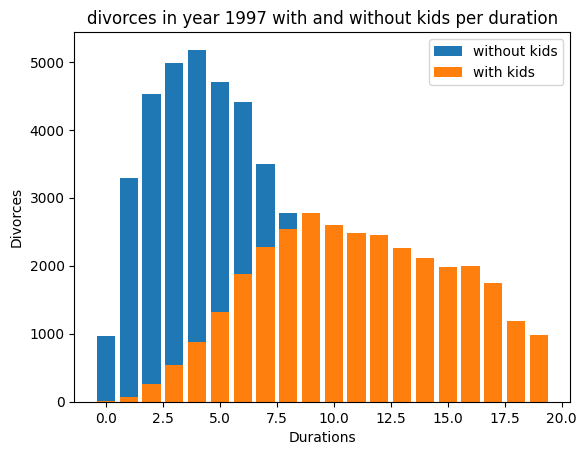

In [ ]:
with_kids_1997_all_durations = year_1997_1kid_all_durations + year_1997_2kids_all_durations + year_1997_3kids_all_durations
plt.bar(range(0,20), year_1997_wo_kids_all_durations)  
plt.bar(range(0,20), with_kids_1997_all_durations)  
 


plt.ylabel("Divorces")
plt.xlabel("Durations")
plt.legend(["without kids","with kids"])
plt.title("divorces in year 1997 with and without kids per duration")

[2294438. 1229651.  849040.  222995.]
[ 80664. 100806.  93249.  94850.  96893. 101830. 107888. 107106.  99250.
  94120.  91700.  94521.  91474.  91455.  92892.  88863.  84844.  84042.
  82019.  81936.  76869.  74523.  74661.  72138.  73467.  69626.]
(array([6]),)


' squarify.plot(sizes = max_elementweise, \n              pad = 0.2,\n              text_kwargs = {\'fontsize\': 10, \'color\': \'white\'},\n              color = sb.color_palette("rocket", len(values))) '

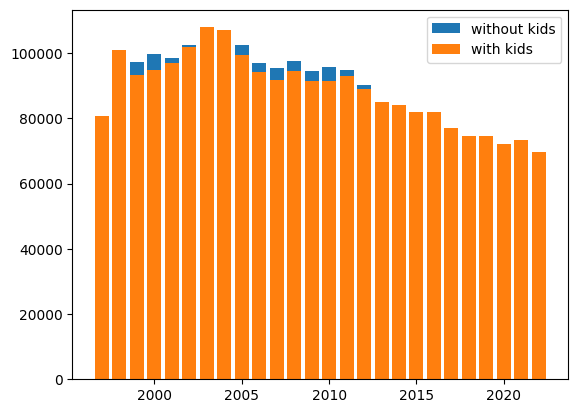

In [ ]:
sum_over_duration_per_year_per_kid = dataset_array.sum(axis=1)
#print(sum_over_duration_per_year_per_kid)
sum_over_all_years = sum_over_duration_per_year_per_kid.sum(axis=0)
print(sum_over_all_years)
summe_spalten_2_3_4 = np.sum(sum_over_duration_per_year_per_kid[:, 1:4], axis=1)
print(summe_spalten_2_3_4)
without_kids = sum_over_duration_per_year_per_kid[:, 0]
plt.bar(range(1997,2023), without_kids)
plt.bar(range(1997,2023), summe_spalten_2_3_4)

plt.legend([ "without kids","with kids"])

max_elementweise = np.maximum(without_kids, summe_spalten_2_3_4)
position = np.where(max_elementweise == max_elementweise.max())
liste = np.where(max_elementweise == without_kids[position])
print(position)

""" squarify.plot(sizes = max_elementweise, 
              pad = 0.2,
              text_kwargs = {'fontsize': 10, 'color': 'white'},
              color = sb.color_palette("rocket", len(values))) """